In [ ]:
import os # os independent path construction 
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
os.chdir('/content/drive/My Drive/lesion_detection')

Mounted at /content/drive


In [ ]:
# training groundtruth task1
# !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip -O /content/drive/My\ Drive/lesion_detection/ISIC2018_Task1_Training_GroundTruth.zip 
# !unzip "/content/drive/My Drive/lesion_detection/ISIC2018_Task1_Training_GroundTruth.zip" -d "/content/drive/My Drive/lesion_detection/dataset/"

In [ ]:
!pip3 install ripser
import TDAimgprocess as TIP # topological image modification and processing
import time # tracking computation time
import random # setting seeds
import numpy as np # handling arrays and general math
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # handling images
import PIL # imaging library
from skimage.segmentation import chan_vese # chan_vese segmentation
from skimage.segmentation import slic # k-means clustering based oversegmentation
from skimage.filters import roberts # Roberts' cross operator for edge detection
from skimage.morphology import convex_hull_image # construct convex hull of a binary image
import skimage.filters as filters # infer ISODATA thresholds from images
from skimage.segmentation import active_contour # active contour segmentation 
import cv2 # binarize images

In [ ]:
img = mpimg.imread(os.path.join("dataset","ISIC2018_Task1-2_Training_Input", "ISIC_0000012.jpg"))
sgm_truth = mpimg.imread(os.path.join("dataset","ISIC2018_Task1_Training_GroundTruth", "ISIC_0000012_segmentation.png"))

while(img.shape[1]>500):
  img = cv2.resize(img,(0, 0), fx = 0.5, fy = 0.5)
  sgm_truth = cv2.resize(sgm_truth,(0, 0), fx = 0.5, fy = 0.5)

img_gray = np.asarray(PIL.Image.fromarray((img).astype(np.uint8)).convert("L")).copy().astype("float") # grayscale
img_gray += 0.01 * np.random.randn(*img_gray.shape) # random noise

window_size = 25
border_width = 25

start_time = time.time()
TIP_img = TIP.topological_process_img(img_gray, window_size=window_size, border_width=border_width)
elapsed_time = time.time() - start_time
# print("Time for Topological Image Processing: " + time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

acc = TIP.get_metrics(TIP_img["components"], sgm_truth)['accuracy']

In [ ]:
acc

0.9017479189030442

In [ ]:
import pickle
with open('TIP_acc.pkl', 'rb') as f:
   mynewlist = pickle.load(f)

def Convert(lst):
    res_dct = {lst[i][0]: lst[i][1] for i in range(len(lst))}
    return res_dct
acc_dict = Convert(mynewlist)

In [ ]:
path = "dataset/ISIC2018_Task1-2_Training_Input"

db_size = 0
# acc_dict =  []
problematic_lst = []

for file_name in os.listdir(path):

  if(file_name[-3:]=='jpg'): # is image
    
    img_name = file_name
    sgm_name = img_name[:-4] + "_segmentation.png"

    db_size +=1
    if img_name in acc_dict.keys():
      continue

    img = mpimg.imread(os.path.join("dataset","ISIC2018_Task1-2_Training_Input", img_name))
    sgm_truth = mpimg.imread(os.path.join("dataset","ISIC2018_Task1_Training_GroundTruth", sgm_name))

    while(img.shape[1]>500):
      img = cv2.resize(img,(0, 0), fx = 0.5, fy = 0.5)
      sgm_truth = cv2.resize(sgm_truth,(0, 0), fx = 0.5, fy = 0.5)

    img_gray = np.asarray(PIL.Image.fromarray((img).astype(np.uint8)).convert("L")).copy().astype("float") # grayscale
    img_gray += 0.01 * np.random.randn(*img_gray.shape) # random noise

    window_size = 25
    border_width = 25

    try:
      TIP_img = TIP.topological_process_img(img_gray, window_size=window_size, border_width=border_width)

      acc = TIP.get_metrics(TIP_img["components"], sgm_truth)['accuracy']
      acc_dict[img_name] = acc

      print(db_size, img_name ,acc)

    except:
      problematic_lst.append(img_name)
      print('Image',img_name, 'is really problematic!!!!!!!!!!!!!!!!!!!!!!!')
      pass
    

    # calculate the accuracy
    # mtr = TIP.get_metrics(our_sgm, sgm_truth)
    # a_counter = Counter(dict_1)
    # b_counter = Counter(dict_2)
    # add_dict = a_counter + b_counter
    



Image ISIC_0009888.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0009884.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0009982.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0009993.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0010220.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0010237.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0010244.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0010357.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0010350.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0010439.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
1332 ISIC_0010457.jpg 0.20421771440048203
Image ISIC_0010474.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
Image ISIC_0010467.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
1374 ISIC_0010581.jpg 0.971186713314835
Image ISIC_0010590.jpg is really problematic!!!!!!!!!!!!!!!!!!!!!!!
1376 ISIC_0010572.jpg 0.7311812799

In [ ]:
acc_dict_sorted = sorted(acc_dict.items(), key=lambda x: x[1])

In [ ]:
import pickle

open_file = open('TIP_acc_2.pkl', "wb")
pickle.dump(acc_dict_sorted, open_file)
open_file.close()

In [ ]:
import pickle
open_file = open('TIP_problematic_lst.pkl', "wb")
pickle.dump(problematic_lst, open_file)
open_file.close()

In [ ]:
problematic_lst

['ISIC_0009888.jpg',
 'ISIC_0009884.jpg',
 'ISIC_0009982.jpg',
 'ISIC_0009993.jpg',
 'ISIC_0010220.jpg',
 'ISIC_0010237.jpg',
 'ISIC_0010244.jpg',
 'ISIC_0010357.jpg',
 'ISIC_0010350.jpg',
 'ISIC_0010439.jpg',
 'ISIC_0010474.jpg',
 'ISIC_0010467.jpg',
 'ISIC_0010590.jpg',
 'ISIC_0010856.jpg',
 'ISIC_0010852.jpg',
 'ISIC_0011110.jpg',
 'ISIC_0011219.jpg',
 'ISIC_0011207.jpg',
 'ISIC_0011296.jpg',
 'ISIC_0011303.jpg',
 'ISIC_0000240.jpg',
 'ISIC_0000384.jpg',
 'ISIC_0000409.jpg']

# Problematic Images

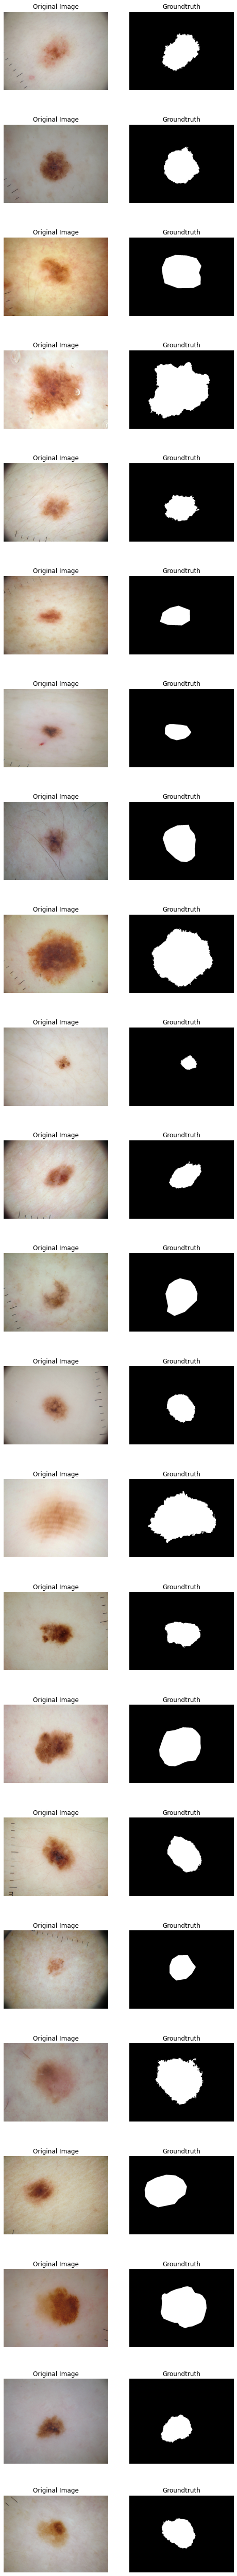

In [ ]:
fig, axes = plt.subplots(len(problematic_lst), 2, figsize=(8, 92))
# ax = axes.flatten()

for i in range(len(problematic_lst)):

  img_name = problematic_lst[i]
  sgm_name = img_name[:-4] + "_segmentation.png"


  img = mpimg.imread(os.path.join("dataset","ISIC2018_Task1-2_Training_Input", img_name))
  sgm_truth = mpimg.imread(os.path.join("dataset","ISIC2018_Task1_Training_GroundTruth", sgm_name))


  axes[i,0].imshow(img)
  axes[i,0].set_axis_off()
  axes[i,0].set_title("Original Image", fontsize=12)

  axes[i,1].imshow(sgm_truth, cmap="gray")
  axes[i,1].set_axis_off()
  axes[i,1].set_title("Groundtruth", fontsize=12)

plt.show()

ISIC_0010056.jpg accuracy:  0.048143770160078536
ISIC_0009988.jpg accuracy:  0.056266344799839066
ISIC_0015062.jpg accuracy:  0.056593995397291076
ISIC_0011356.jpg accuracy:  0.06372539080716125
ISIC_0011334.jpg accuracy:  0.09127127852227454
ISIC_0010204.jpg accuracy:  0.09358860555196902
ISIC_0012510.jpg accuracy:  0.10202061855670103
ISIC_0011120.jpg accuracy:  0.10562800136631237
ISIC_0010588.jpg accuracy:  0.11099493284002251
ISIC_0011121.jpg accuracy:  0.11764350209609803


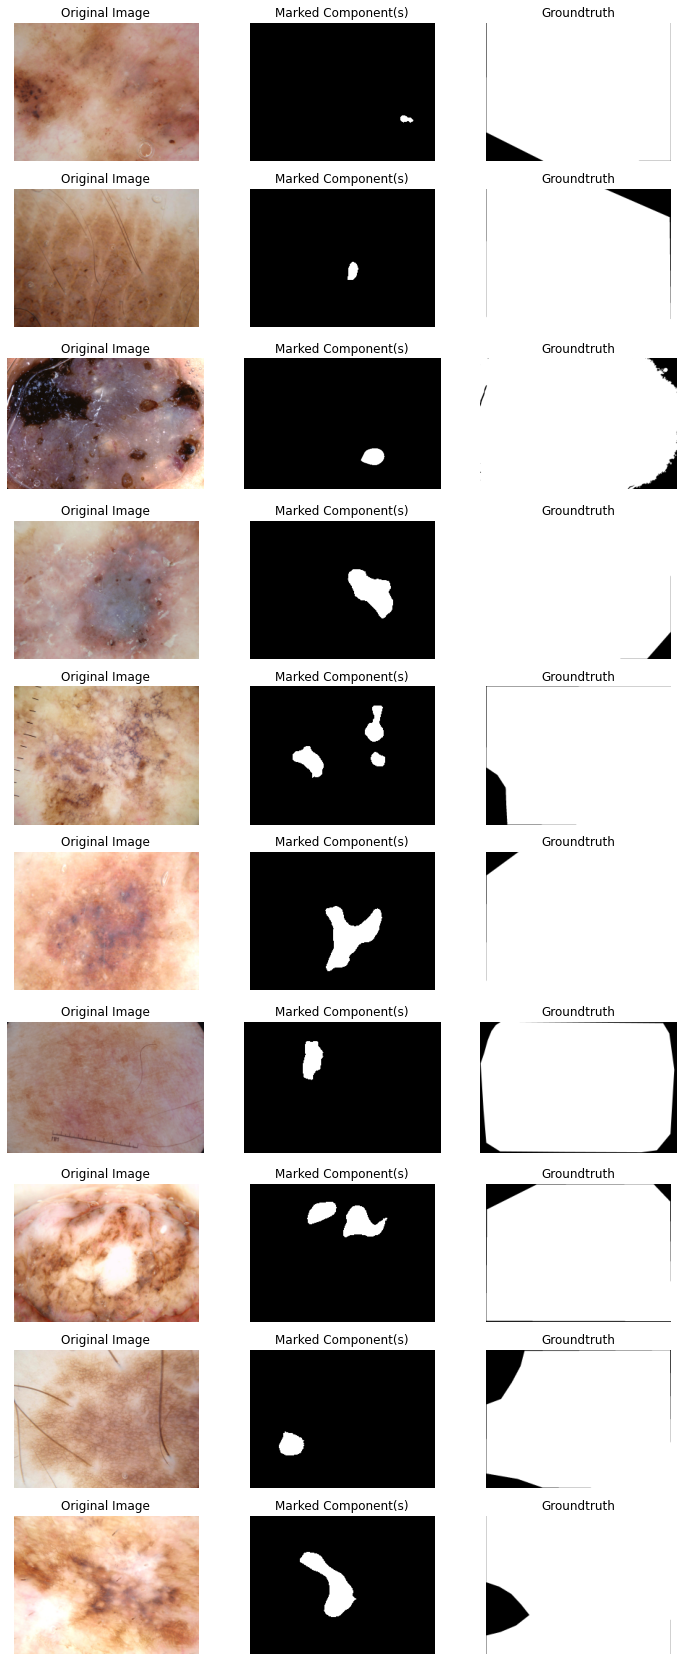

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(12, 30))
# ax = axes.flatten()

for i in range(10):

  img_name = acc_dict_sorted[i][0]
  sgm_name = img_name[:-4] + "_segmentation.png"

  print(img_name,'accuracy: ',acc_dict_sorted[i][1])


  img = mpimg.imread(os.path.join("dataset","ISIC2018_Task1-2_Training_Input", img_name))
  sgm_truth = mpimg.imread(os.path.join("dataset","ISIC2018_Task1_Training_GroundTruth", sgm_name))

  while(img.shape[1]>500):
    img = cv2.resize(img,(0, 0), fx = 0.5, fy = 0.5)
    sgm_truth = cv2.resize(sgm_truth,(0, 0), fx = 0.5, fy = 0.5)

  img_gray = np.asarray(PIL.Image.fromarray((img).astype(np.uint8)).convert("L")).copy().astype("float") # grayscale
  img_gray += 0.01 * np.random.randn(*img_gray.shape) # random noise

  window_size = 25
  border_width = 25

  try:
    TIP_img = TIP.topological_process_img(img_gray, window_size=window_size, border_width=border_width)
  except:
    print('Image',img_name, 'is really problematic!!!!!!!!!!!!!!!!!!!!!!!')
    pass

  axes[i,0].imshow(img)
  axes[i,0].set_axis_off()
  axes[i,0].set_title("Original Image", fontsize=12)

  axes[i,1].imshow(TIP_img["components"], cmap="gray")
  axes[i,1].set_axis_off()
  axes[i,1].set_title("Marked Component(s)", fontsize=12)

  axes[i,2].imshow(sgm_truth, cmap="gray")
  axes[i,2].set_axis_off()
  axes[i,2].set_title("Groundtruth", fontsize=12)

plt.show()

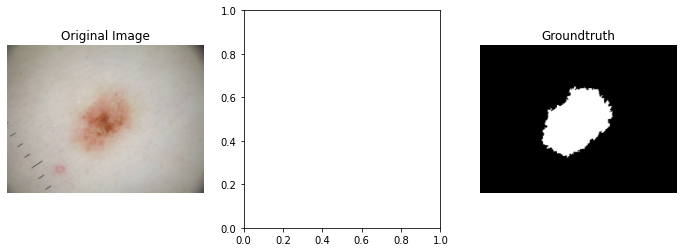

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# print('accuracy: ',acc_dict_sorted[i][1])
img_name = "ISIC_0009888.jpg"
sgm_name = img_name[:-4] + "_segmentation.png"

img = mpimg.imread(os.path.join("dataset","ISIC2018_Task1-2_Training_Input", img_name))
sgm_truth = mpimg.imread(os.path.join("dataset","ISIC2018_Task1_Training_GroundTruth", sgm_name))

while(img.shape[1]>500):
  img = cv2.resize(img,(0, 0), fx = 0.5, fy = 0.5)
  sgm_truth = cv2.resize(sgm_truth,(0, 0), fx = 0.5, fy = 0.5)

img_gray = np.asarray(PIL.Image.fromarray((img).astype(np.uint8)).convert("L")).copy().astype("float") # grayscale
img_gray += 0.01 * np.random.randn(*img_gray.shape) # random noise

window_size = 25
border_width = 25

# TIP_img = TIP.topological_process_img(img_gray, window_size=window_size, border_width=border_width)

axes[0].imshow(img)
axes[0].set_axis_off()
axes[0].set_title("Original Image", fontsize=12)

# axes[1].imshow(TIP_img["components"], cmap="gray")
# axes[1].set_axis_off()
# axes[1].set_title("Marked Component(s)", fontsize=12)

axes[2].imshow(sgm_truth, cmap="gray")
axes[2].set_axis_off()
axes[2].set_title("Groundtruth", fontsize=12)

plt.show()